In [25]:
import sys                                                                           
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
from matplotlib.pyplot import *
from scipy.signal import fftconvolve
import fileread as fr
import predefined as pd
import wave_ops as wo
import pFilter

def filter_bounds(data):
    trutharray=np.ones(len(data),dtype=bool)
    t0=np.logical_not(pd.land(data['pfilter0']==1,data['energy']>900))
    t1=np.logical_not(pd.land(data['pfilter1']==1,data['energy']>600))
    t2=np.logical_not(pd.land(data['pfilter2']==1,data['energy']>500))
    trutharray=pd.land(trutharray,pd.land(pd.land(t0,t1),t2))
    return trutharray

means=np.array([1000, 1031.3367, 1086.8575, 1217.0291, 1041.5563, 1000, 1230.2096, 1188.8999,\
                1000, 1263.1642, 1233.1743, 1056.3289, 1213.4717, 1112.0769, 1049.4534, 1219.0482,\
                1000, 1000, 1077.4932, 1157.1627, 1000, 1163.2235, 1000, 1000,\
                1000, 1027.103, 1111.1212, 1033.5468, 1109.469, 1022.693, 1929.7336, 1000,\
                1000, 1124.478, 1073.1306, 1040.2197, 1100.4457, 1045.0566, 1135.8975, 1073.1854,\
                1000, 1000, 1087.187, 1133.1069, 1005.3494, 1000, 1000, 1000])

data=fr.gen_output('../cur_data/Run_131-all.dat')[0]

0.32515748777857545
[42.64755428 13.01388029  2.58872611]
0.5400626512818185


/home/noah/.local/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


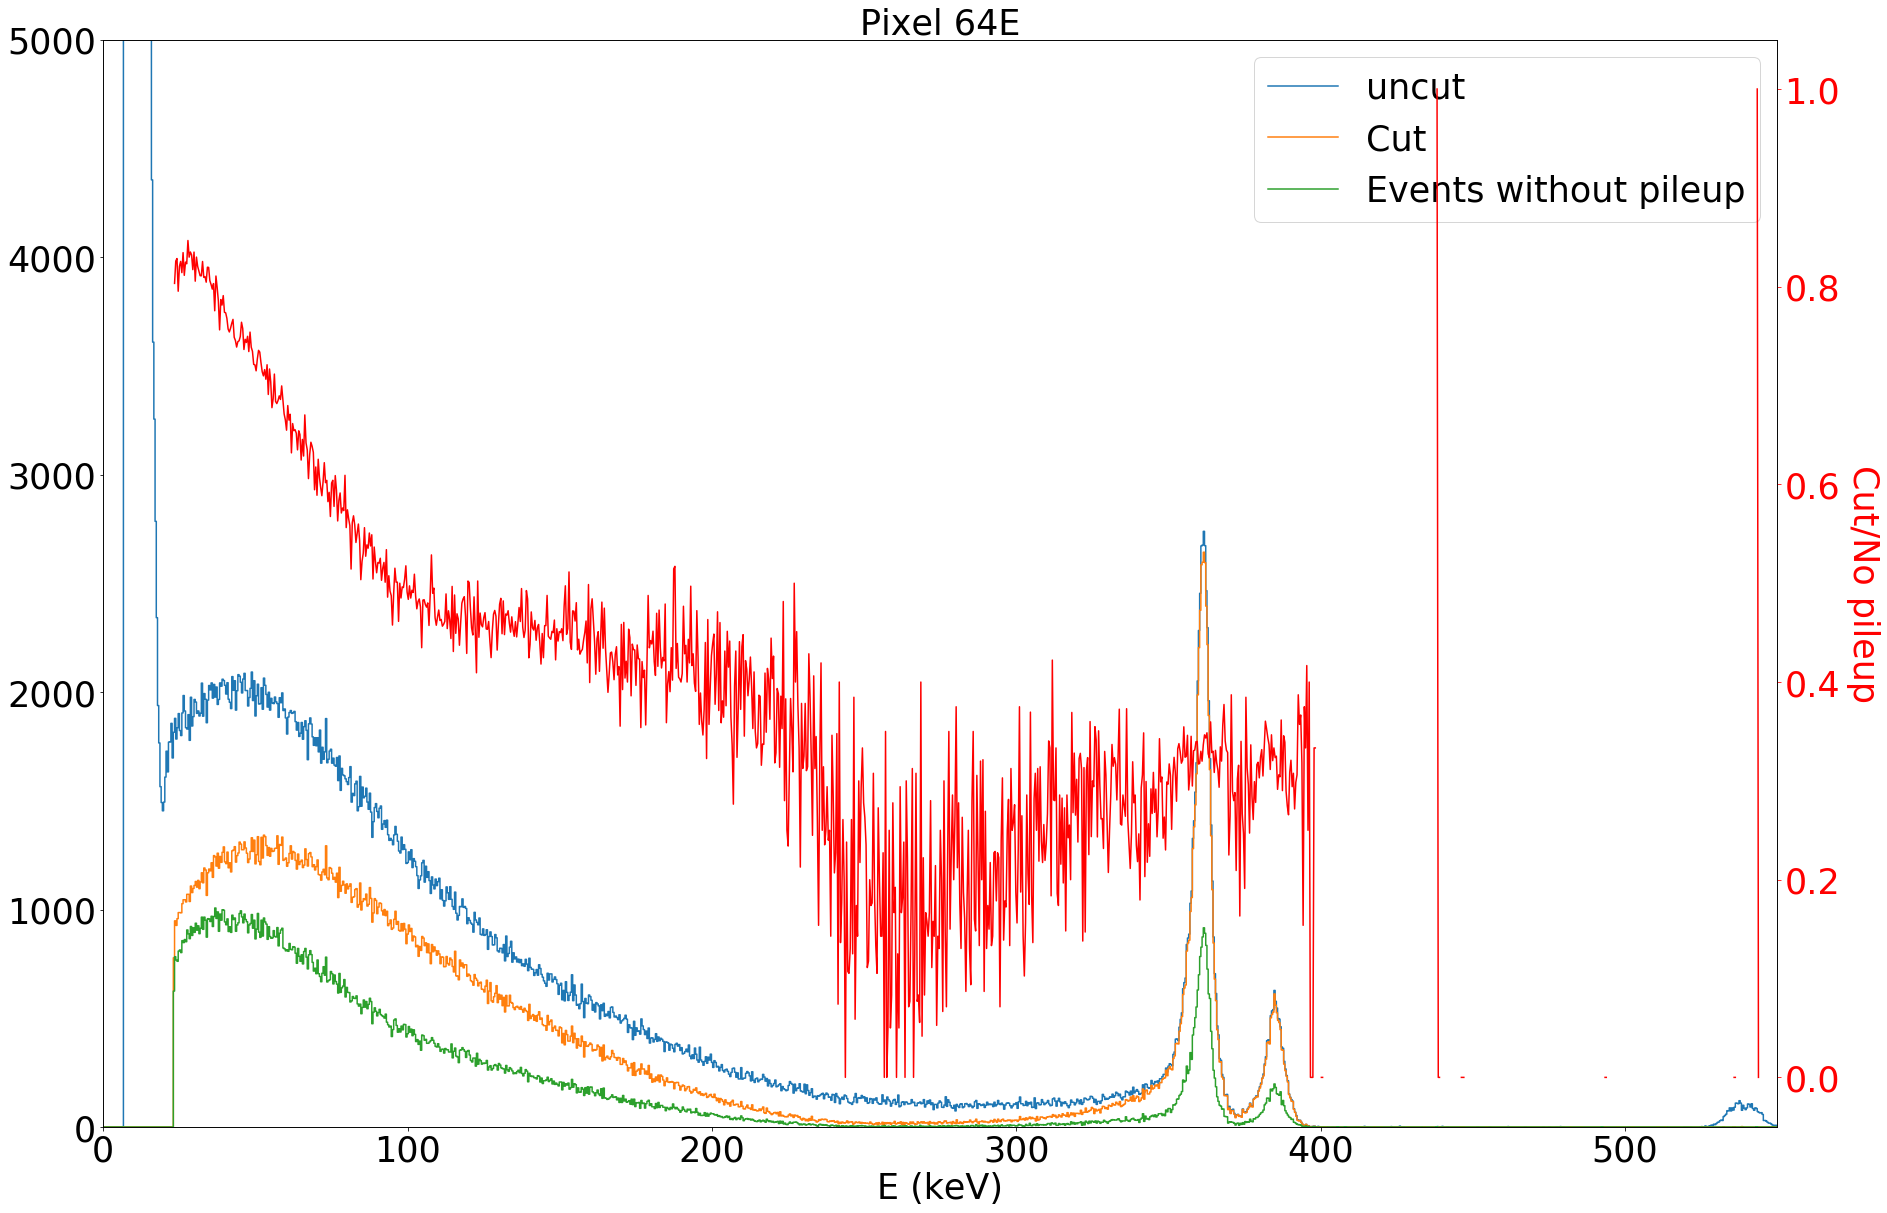

In [30]:
bd,ch = 4,3 ###64E
i=8*bd+ch
fs=35
figure(figsize=(30,20))
gainmatch=False
if i ==6:
    m,b=1/6.28,3.46
if i==11:
    if gainmatch==True:
        m,b=1/6.28,3.46
        fac=pulser['mu'][6]/pulser['mu'][i]
    else:
        m,b=1/6.43,-10.1
        fac=1
if i==35:
    if 1==0 and gainmatch==True:
        m,b=1/6.28,3.46
        fac=pulser['mu'][6]/pulser['mu'][i]
    else:
        m,b=1/6.18,43.7
        fac=1
if i==12:
    m,b=1/6.24,-21.82
    fac=1

hist,bins=np.histogram((pd.single_pixel(data,bd,ch)['energy']+b)*m,bins=2000,range=[0,800])
bins=pd.cbins(bins)
l=np.sum(hist)
plot(bins,hist,ls='steps',label='uncut')


#cutdata=data[data['energy']>100]
cutdata=pd.precuts(data)
hist,bins=np.histogram((pd.single_pixel(cutdata,bd,ch)['energy']+b)*m,bins=2000,range=[0,800])
l=np.sum(hist)/l
print(l)
bins=pd.cbins(bins)
plot(bins,hist,ls='steps',label='Cut')

tots=[np.sum(cutdata['pfilter0'][pd.land(cutdata['board']==bd,cutdata['channel']==ch)]),\
      np.sum(cutdata['pfilter1'][pd.land(cutdata['board']==bd,cutdata['channel']==ch)]),\
      np.sum(cutdata['pfilter2'][pd.land(cutdata['board']==bd,cutdata['channel']==ch)])]
tots=np.array(tots)
tots=tots/len(pd.single_pixel(cutdata,bd,ch))*100
print(tots)

l=len(pd.single_pixel(cutdata,bd,ch))

cutdata=cutdata[cutdata['pfilter0']+cutdata['pfilter1']+cutdata['pfilter2'] == 0]
#cutdata=cutdata[filter_bounds(cutdata)]
l=len(pd.single_pixel(cutdata,bd,ch))/l
print(l)
h1=np.array(hist)
hist,bins=np.histogram((pd.single_pixel(cutdata,bd,ch)['energy']+b)*m,bins=2000,range=[0,800])
bins=pd.cbins(bins)
plot(bins,hist,ls='steps',label='Events without pileup')
hist=np.array(hist)

title('Pixel '+pd.pixel(bd,ch),fontsize=fs)
legend(fontsize=fs)
tick_params(labelsize=fs)
xlabel('E (keV)',fontsize=fs)
ylim((1,5000))
#yscale('log')
xlim(0,550)
twinx()
plot(bins,hist/h1,'r-')
tick_params('y',colors='r',labelsize=fs)
ylabel('Cut/No pileup', rotation=270,fontsize=fs,labelpad=40,color='r')

show()

In [22]:
fs=40
t=np.arange(3500)
plt.figure(figsize=(30,20))
for i in range(0,10,2):
    plt.plot(t,waves[i],label='wave[{index:0d}]'.format(index=i))
plt.tick_params(labelsize=fs)
plt.legend(fontsize = fs)
plt.show()

NameError: name 'plt' is not defined

In [4]:
x=np.zeros((len(waves),3))
y=np.zeros((len(waves),3))
for i in range(len(waves)):
    x[i]=pFilter.execute(waves[i],1050.)
pileup(data,y)
tots=np.array((np.sum(x[:,0]),np.sum(x[:,1]),np.sum(x[:,2])))
print (tots, len(waves),tots/len(waves)*100)

29403
[10656.  3298.  1204.] 29403 [36.24119988 11.21654253  4.09482026]


[1. 1. 0.]


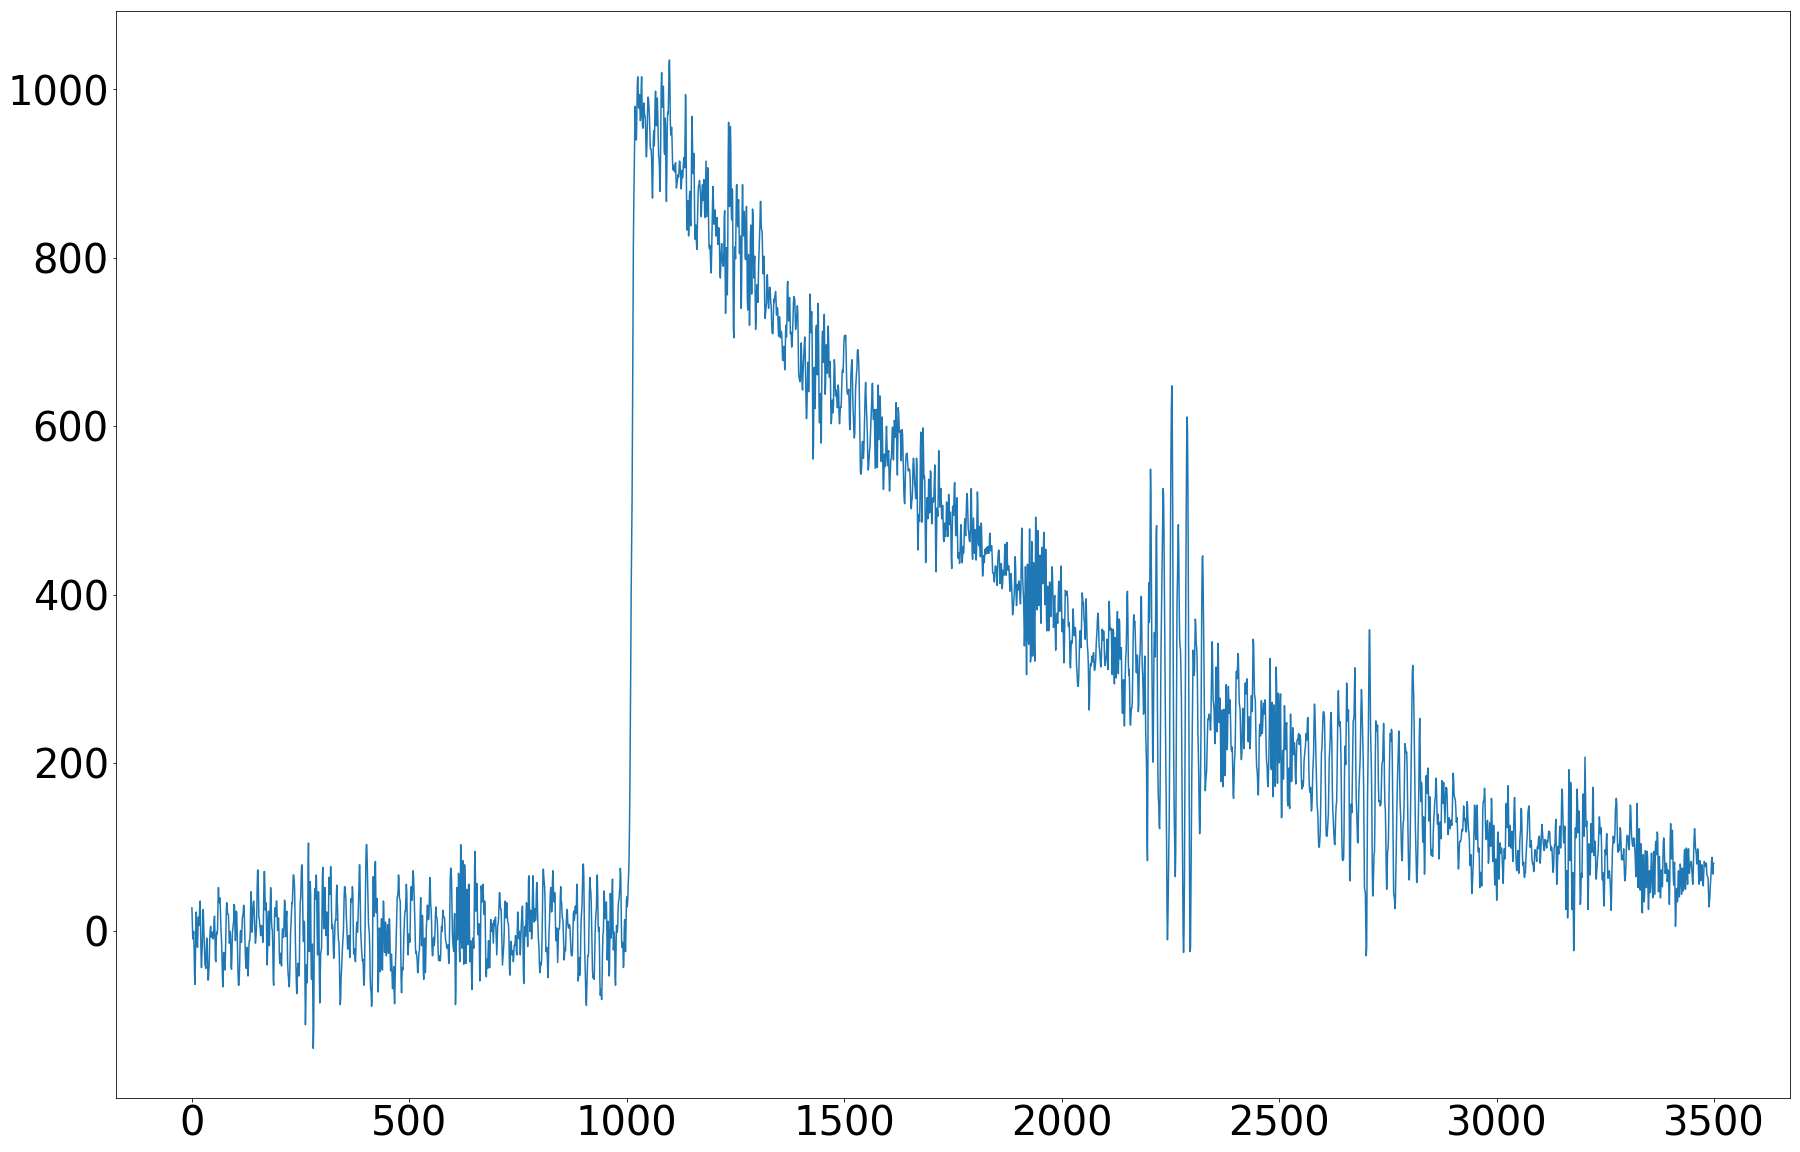

In [5]:
count=0
plt.figure(figsize=(30,20))
for i in range(len(waves)):
    if x[i,0]==1:
        print (x[i,:])
        plt.plot(t,waves[i])
        break
    count+=1
plt.tick_params(labelsize=fs)
plt.show()